In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
pd.set_option('display.max_colwidth', None)  # Optional: Set max column width
pd.set_option('display.expand_frame_repr', False)  # Optional: Do not wrap line

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_excel('data99.xlsx', index_col=0)

Firstly, I want to remove those that have no answer to the asbh02a question because this is the most important for my analysis. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50367 entries, 0 to 50366
Data columns (total 57 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   IDCNTRY   50367 non-null  int64  
 1   IDSTUD    50367 non-null  int64  
 2   ASBH02A   41503 non-null  object 
 3   ASBH02B   16269 non-null  object 
 4   ASBH03A   41179 non-null  object 
 5   ASBH04    41231 non-null  object 
 6   ASBH15A   37405 non-null  object 
 7   ASBH15B   34597 non-null  object 
 8   ASBH16    40406 non-null  object 
 9   ASBH17A   36503 non-null  object 
 10  ASBH17B   32361 non-null  object 
 11  ASBH18AA  40161 non-null  object 
 12  ASBH18AB  35131 non-null  object 
 13  ASBG01    49428 non-null  object 
 14  ASBG03    48168 non-null  object 
 15  ASDAGE    50358 non-null  float64
 16  ASBG10A   48311 non-null  object 
 17  ASBG10B   48077 non-null  object 
 18  ASBG10C   47893 non-null  object 
 19  ASBG10D   47822 non-null  object 
 20  ASBG10E   47844 non-null  ob

In [6]:
df = df[df['ASBH02A'].notna() & (df['ASBH02A'] != 9)]

In [7]:
df.shape

(41365, 57)

Now I want to change the countries so that they are easier for analysis

In [9]:
df= df.rename(columns={'IDCNTRY': 'Country'})

# Mapping dictionary
update_dict = {40: 'Austria', 818: 'Egypt', 250:'France', 276:'Germany',364:'Iran',400:'Jordan',528:'Netherlands',752:'Sweden',792:'Turkey'}

# Updating the column using map
df['Country'] = df['Country'].map(update_dict).fillna(df['Country'])

Now I want to round the 'ASDAGE' column as it is in percentages and I want it to be in integers for analysis.

In [10]:
df['ASDAGE'] = df['ASDAGE'].round()

In [11]:
df['ASDAGE'].value_counts()

10.0    32829
11.0     6158
9.0      1762
12.0      516
13.0       63
14.0       14
8.0        14
99.0        3
7.0         1
Name: ASDAGE, dtype: int64

I should replace the 99 with NaN

In [12]:
df['ASDAGE']= df['ASDAGE'].replace(99.0, np.nan)

In [13]:
df['ASDAGE'].value_counts()

10.0    32829
11.0     6158
9.0      1762
12.0      516
13.0       63
14.0       14
8.0        14
7.0         1
Name: ASDAGE, dtype: int64

In [12]:
# Apply unique() to each column
unique_values = df.apply(lambda col: col.unique())

print(unique_values)

Country                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

I want to assign ordinal numbers to string values in the 'ASBH02B' column which signifies age of arrival, so that they are uniform as the column includes both string and float values. changing 'Younger than .... to ...

In [14]:
# Define the function to map patterns to integers
def map_using_patterns(text):
    # Dictionary of regex patterns to integers
    pattern_to_integer = {
        r'Younger': 1,
        r'5': 2,
        r'7': 3,
        r'8': 4
    }

    # Check if the input is a string
    if isinstance(text, str):
        for pattern, integer in pattern_to_integer.items():
            if pd.Series([text]).str.contains(pattern).any():
                return integer
    return text  # Return the original value if it's not a string or no pattern matches

# Apply the function to the 'ASBH02B' column
df['ASBH02B'] = df['ASBH02B'].apply(map_using_patterns)


In [15]:
df['ASBH02B'] = df['ASBH02B'].replace({6.0: np.nan, 9.0: np.nan})

In [16]:
df['ASBH02B'].value_counts(dropna=False)

NaN    38671
1.0     1110
2.0      852
3.0      483
4.0      249
Name: ASBH02B, dtype: int64

In [17]:
def populate_column(row):
    if row['ASBH02B'] == 1:
        return 0
    elif row['ASBH02B'] == 2:
        return 3
    elif row['ASBH02B'] == 3:
        return 6
    elif row['ASBH02B'] == 4:
        return 8
    else:
        return None  # Or any default value

# Apply the function to each row
df['MINAGEARRIVAL'] = df.apply(populate_column, axis=1)

In [18]:
df['MINAGEARRIVAL'].value_counts(dropna=False)

NaN    38671
0.0     1110
3.0      852
6.0      483
8.0      249
Name: MINAGEARRIVAL, dtype: int64

I want to check all the unique values for each of the columns in my data set so that they are uniform (not mixed, strings with floats) and to remove any values that are not useful. 

In [18]:
# Apply unique() to each column
unique_values = df.apply(lambda col: col.unique())

print(unique_values)

Country                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

I am grouping the columns into 5 groups for better understanding of the data. These are: identifier_columns, demographic_info_columns, positive_feelings_in_school, negativeexperience_in_school_columns, assessment_score_columns.

In [19]:
identifier_columns = ['Country','ASBH02A']
demographic_info_columns = ['ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03', 'ASDAGE','MINAGEARRIVAL' ]
positive_feelings_in_school = ['ASBG10A', 'ASBG10B','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F']
negativeexperience_in_school_columns = ['ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']
assessment_score_columns = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']

All the negativeexperience_in_school_columns are rated on the same scale. So I want to remove all the string values and assign them their associated integer value. 

In [20]:
ordinal_mapping_frequency = {
    'At least once a week': 1,
    'Once or twice a month': 2,
    'A few times a year': 3,
    'Never': 4
}

In [21]:
for column in negativeexperience_in_school_columns:
    df[column]= df[column].map(ordinal_mapping_frequency)

In [22]:
# Apply unique() to each column
unique_values_school_experience = df[negativeexperience_in_school_columns].apply(lambda col: col.unique())

print(unique_values_school_experience)

   ASBG11A  ASBG11B  ASBG11C  ASBG11D  ASBG11E  ASBG11F  ASBG11G  ASBG11H  ASBG11I  ASBG11J
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN
1      4.0      4.0      3.0      2.0      4.0      4.0      4.0      3.0      4.0      4.0
2      2.0      2.0      1.0      4.0      3.0      3.0      2.0      4.0      1.0      3.0
3      3.0      3.0      2.0      3.0      2.0      2.0      3.0      1.0      3.0      1.0
4      1.0      1.0      4.0      1.0      1.0      1.0      1.0      2.0      2.0      2.0


All the positive_feelings_in_school are rated on the same scale. So I want to remove all the string values and assign them their associated integer value.

In [23]:
ordinal_mapping_agreement = { 
    'Agree a lot': 1,
    'Agree a little': 2,
    'Disagree a little': 3,
    'Disagree a lot': 4
}

In [24]:
for column in positive_feelings_in_school:
    df[column]= df[column].map(ordinal_mapping_agreement)

In [25]:
# Apply unique() to each column
unique_values_school_feeling = df[positive_feelings_in_school].apply(lambda col: col.unique())

print(unique_values_school_feeling)

   ASBG10A  ASBG10B  ASBG10C  ASBG10D  ASBG10E  ASBG10F
0      NaN      NaN      NaN      NaN      NaN      NaN
1      2.0      3.0      2.0      2.0      3.0      1.0
2      1.0      2.0      1.0      1.0      1.0      2.0
3      3.0      1.0      3.0      3.0      2.0      3.0
4      4.0      4.0      4.0      4.0      4.0      4.0


In [26]:
# Mapping dictionary
update_dict2 = {1.0: 'native_born',2.0:'foreign_born' }

# Updating the column using map
df['ASBH02A'] = df['ASBH02A'].map(update_dict2).fillna(df['ASBH02A'])
df['ASBH02A'].value_counts()

Yes             25072
native_born     13403
No               2342
foreign_born      548
Name: ASBH02A, dtype: int64

## Understanding Missing Data

I am interested in understanding the extent of missing data in my data set and where this data is present. I am going to use heatmaps to get a better idea of this.

In [2]:
df.shape

NameError: name 'df' is not defined

In [21]:
# Perform the Groupby Operation
grouped = df.groupby('Country')

pivot_missing_data = df.pivot_table(
    index=['Country','ASBH02A'],
    aggfunc=lambda x: x.isnull().sum(),
)

# Calculate the total number of elements in each group
total_counts = df.groupby(['Country','ASBH02A']).size()

# Calculate the percentage of missing values
percentage_missing = pivot_missing_data.div(total_counts, axis=0) * 100

print("Pivot Table with Percentage of Missing Values:\n", percentage_missing)

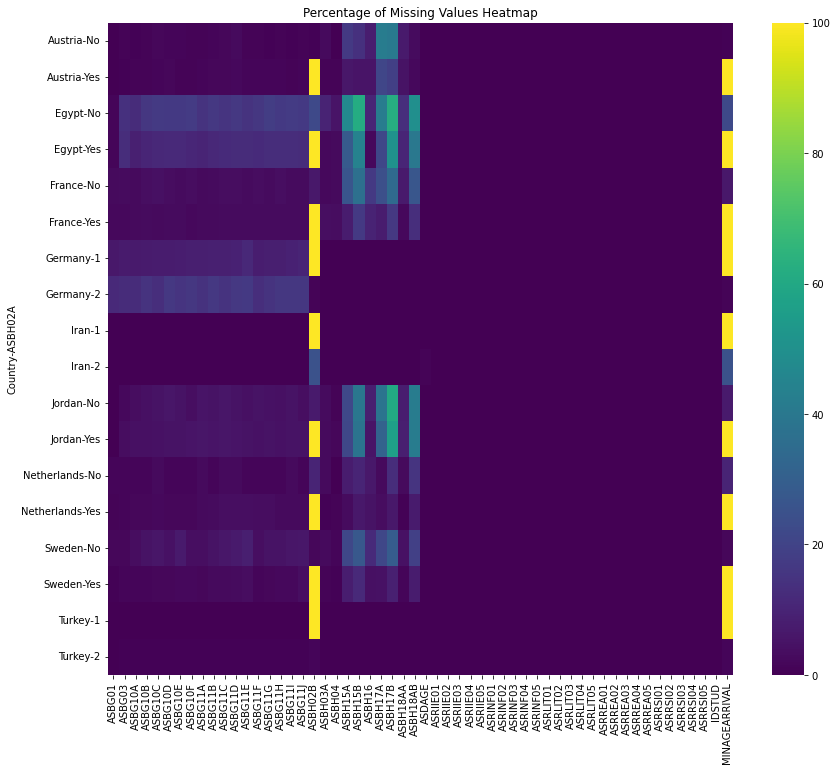

In [22]:
# Create the heatmap
plt.figure(figsize=(14,12 ))
sns.heatmap(percentage_missing, annot=False, cmap='viridis', fmt='.2f')

plt.title('Percentage of Missing Values Heatmap')
plt.show()

So **Iran** and **Turkey** have no experience data.

**Egypt**  and **Jordan** are missing quite a few demographic columns.

"ASBH16" is hopes for child's level of education - most parents seem to have answered this.

Germany, Iran and Turkey have not answered any questions on how often lang of test spoken at home (4) parents' level of edu 15,  professions 17, level of language 18. Iran and Turkey have also not answered sex of child G01 or how often child says lang spoken at home G03.

So this is helpful for our analysis. We can compare test scores for all countries. We can only compare feelings in school and experiences for certain countries - not Iran and Turkey. \ Likewise it is important to think about what to do with additional demographic data that goes further than whether the child was born in the country. Perhaps we should first focus on this one demographic variable and look at the others in a further analysis.